In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset to use for map visualization
cl_real_happiness = pd.read_csv('./data/cl_real_happiness.csv')

# filter by country and then just picked max price as min/max/mean all the same
cl_real_happiness_price = cl_real_happiness.groupby(by='country')['price_per_sq_meter (city)'].mean()
cl_real_happiness_price = cl_real_happiness_price.reset_index()

# filter by country and then just picked max life expect as min/max/mean all the same
cl_real_happiness_life = cl_real_happiness.groupby(by='country')['Healthy life expectancy (country)'].max()
cl_real_happiness_life = cl_real_happiness_life.reset_index()

# filter by country and then just picked max social support as min/max/mean all the same
cl_real_happiness_social = cl_real_happiness.groupby(by='country')['Social support (country)'].max()
cl_real_happiness_social = cl_real_happiness_social.reset_index()

# merge all three data sets
country_price_life = pd.merge(cl_real_happiness_price, cl_real_happiness_life, how='inner', on='country')
country_price_life_social = pd.merge(country_price_life, cl_real_happiness_social, how='inner', on='country')
# drop NaN and duplicates
country_price_life_social.dropna(inplace=True)
country_price_life_social.drop_duplicates(inplace=True)

# Import continents data from Kaggle data set with country and continents
continents = pd.read_csv('./data/countries and continents.csv', header=0)

# cut down the file to only have country name and continent
continents = continents[['name','Continent']]

continents.drop_duplicates(inplace=True)
continents.dropna(inplace=True)

# Name conversion to allow for merge
def name_convert(value):
  if value == 'Democratic Republic of the Congo':
    value = 'Congo (Kinshasa)'
    return value
  if value == 'Congo':
    value = 'Congo (Brazzaville)'
    return value
  if value == 'United Republic of Tanzania':
    value = 'Tanzania'
    return value
  if value == 'US':
    value = 'United States'
    return value
  if value == 'UK':
    value = 'United Kingdom'
    return value
  else:
    return value

continents['name'] = continents['name'].map(name_convert)

# Rename column to match 'country' column in country_price_life_social
continents.columns = continents.columns.str.replace('name', 'country')
country_price_life_social = pd.merge(country_price_life_social, continents, how='left', on='country')

# resolves issue where NA countries left blank
def NA_fill(value):
  if (value == 'SA') or (value == 'AS') or (value == 'AF') or (value == 'EU') or (value == 'OC'):
    return value
  else:
    value = 'NA'
    return value

country_price_life_social['Continent'] = country_price_life_social['Continent'].map(NA_fill)

# Export to CSV
country_price_life_social.to_csv('./data/data_with_continents.csv')

       country  price_per_sq_meter (city)  Healthy life expectancy (country)  \
0  Afghanistan                 486.063333                              52.59   
1      Albania                 887.849000                              68.71   
2      Algeria                 947.055789                              65.91   
5    Argentina                2172.734000                              68.80   
6      Armenia                1518.323333                              66.75   

   Social support (country)  
0                      0.47  
1                      0.67  
2                      0.80  
5                      0.90  
6                      0.76  


Would you like to see price per square meter for countries with the highest Life Expectancy or Social Support scores?
       country  price_per_sq_meter (city)  Healthy life expectancy (country)  \
0  Afghanistan                 486.063333                              52.59   
1      Albania                 887.849000                              68.71   
2      Algeria                 947.055789                              65.91   
3    Argentina                2172.734000                              68.80   
4      Armenia                1518.323333                              66.75   

   Social support (country) Continent  
0                      0.47        AS  
1                      0.67        EU  
2                      0.80        AF  
3                      0.90        SA  
4                      0.76        AS  
10
10
10
10


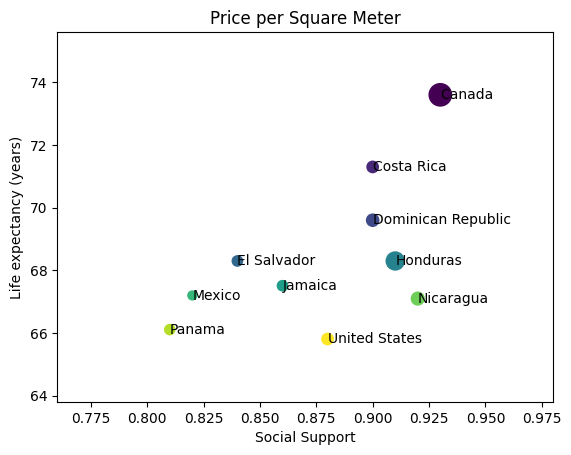

In [3]:
# Import csv data from merge above
data_with_continents = pd.read_csv('./data/data_with_continents.csv', header=0)

# code to enable user to input filters for scatter plot output
print("Would you like to see price per square meter for countries with the highest Life Expectancy or Social Support scores?")
data_filter = input("Input 'life expectancy' or 'social support'")
cont_filter = input('Filter by continent:\nNA (North America)\n SA (South America)\n EU (Europe)\n OC (Oceania)\n AS (Asia)\n AF (Africa)')
    
if data_filter == 'life expectancy':
    column_filter = 'Healthy life expectancy (country)'
elif data_filter == 'social support':
    column_filter = 'Social support (country)'
else:
    data_filter = input("Please try again and input either 'life expectancy' or 'social support'")

if (cont_filter == 'NA') or (cont_filter == 'SA') or (cont_filter == 'AS') or (cont_filter == 'EU') or (cont_filter == 'OC') or (cont_filter == 'AF'):
    cont_filter = cont_filter
else:
    cont_filter = input('Please make sure to input two CAPITALIZED letters for the correct continent code')

country_price_life_social_filtered = country_price_life_social[country_price_life_social['Continent'] == cont_filter]
print(country_price_life_social.head())

country_price_life_social_sorted = country_price_life_social_filtered.sort_values(by=column_filter, ascending=False)
country_price_life_social_top_10 = country_price_life_social_sorted.iloc[0:10]

countries = list(country_price_life_social_top_10['country'].sort_values().unique())
print(len(countries))

price_per = np.array(list(country_price_life_social_top_10['price_per_sq_meter (city)']))
print(len(price_per))

life_exp = list(country_price_life_social_top_10['Healthy life expectancy (country)'])
print(len(life_exp))

social_supp = list(country_price_life_social_top_10['Social support (country)'])
print(len(social_supp))

# Build out scatter plot for top 10 life expectancy countries

fig = plt.figure()
ax = fig.add_subplot(111)
# Some random colours: 
colours = range(len(countries))
ax.scatter(social_supp, life_exp, c=colours, s=price_per/20)

if column_filter == 'Healthy life expectancy (country)':
    ax.set_xlim(min(social_supp)-.05, max(social_supp)+.05)
    ax.set_ylim(min(life_exp)-2, max(life_exp)+2)
elif column_filter == 'Social Support (country)':
    ax.set_xlim(min(social_supp)-.01, max(social_supp)+.01)
    ax.set_ylim(min(life_exp)-1, max(life_exp)+1)

ax.set_xlabel('Social Support')
ax.set_ylabel('Life expectancy (years)')

plt.title("Price per Square Meter")

offset = 0
for x, y, s, country in zip(social_supp, life_exp, price_per, countries):
    ax.text(x+offset, y, country, va='center')

plt.show()